In [81]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data.head()
# Combine the data into a single dataset
mouse_trial = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how="left")

# Display the data table for preview
mouse_trial.head()

# mouse_count = len(mouse_drug_data)
# trial_count = len(clinical_trial_data)
# merge_count = len(mouse_trial)

# print(f"Mice: {mouse_count}")
# print(f"Trials: {trial_count}")
# print(f"Merged: {merge_count}")

# mouse_g989 = mouse_trial.loc[mouse_trial["Mouse ID"]=="g989",:]
# mouse_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [82]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mouse_trial_grouped = mouse_trial.groupby(["Drug","Timepoint"])
mean_tumor = mouse_trial_grouped[["Tumor Volume (mm3)"]].mean()

# Convert to DataFrame

tumor_response_to_treatment = pd.DataFrame(mean_tumor)
tumor_response_to_treatment.reset_index(inplace=True) 

# Preview DataFrame
tumor_response_to_treatment.head(100)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [ ]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [185]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_pivot = tumor_response_to_treatment.pivot_table("Tumor Volume (mm3)", "Timepoint","Drug")

# Preview that Reformatting worked
tumor_response_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


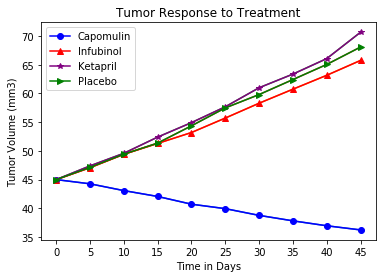

In [240]:
# Generate the Plot (with Error Bars)
tumor_response_pivot_small = tumor_response_pivot[["Capomulin","Infubinol","Ketapril","Placebo",]]

x_axis = np.arange(len(tumor_response_pivot_small))

tick_locations = [value for value in x_axis]
time_points = tumor_response_to_treatment["Timepoint"].unique()
plt.xticks(x_axis, time_points)

# Plot the chart with lables and title
plt.plot (x_axis, tumor_response_pivot_small)
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

# Define Handles
Capomulin_handle, = plt.plot(x_axis, tumor_response_pivot_small["Capomulin"], marker ='o', color='blue', label="Capomulin")
Infubinol_handle, = plt.plot(x_axis, tumor_response_pivot_small["Infubinol"], marker='^', color='red', label="Infubinol")
Ketapril_handle, = plt.plot(x_axis, tumor_response_pivot_small["Ketapril"], marker='*', color='purple', label="Ketapril")
Placebo_handle, = plt.plot(x_axis, tumor_response_pivot_small["Placebo"], marker='>', color='green', label="Placebo")

ax = plt.subplot(111)
ax.legend()

# ([Capomulin_handle, Infubinol_handle, Ketapril_handle,Placebo_handle])

# Save the Figure
plt.savefig("../Images/Treatment.png")
plt.show()

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [100]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [105]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_trial_grouped = mouse_trial.groupby(["Drug","Timepoint"])
mouse_count = mouse_trial_grouped[["Mouse ID"]].count()

# Convert to DataFrame
mouse_survival = pd.DataFrame(mouse_count)
mouse_survival.reset_index(inplace=True) 

# Preview DataFrame
mouse_survival.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [106]:
# Minor Data Munging to Re-Format the Data Frames
mouse_pivot = mouse_survival.pivot_table("Mouse ID", "Timepoint","Drug")

# Preview DataFrame
mouse_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [115]:
# Generate the Plot (Accounting for percentages))

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)